In [1]:
import pandas as pd
from pathlib import Path
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set_theme()
PROJECT_FOLDER = Path().absolute().parent
import sys
sys.path.append(str(PROJECT_FOLDER))

import model_training as mt
from model_training.engine import DataBase

In [2]:

DATA_FOLDER = PROJECT_FOLDER / 'model_training' / 'data'
DATA_FILE = DATA_FOLDER / 'master_db.json'
db = DataBase(DATA_FILE)
db

DataBase(c:\Users\User\OneDrive\Desktop\Code\ConnectFour\model_training\data\master_db.json) - 39321 records

In [3]:
raw_data = pd.DataFrame(db.data)
print(raw_data.shape)
raw_data.head(2)

(39321, 9)


,game_id,player_one_id,player_two_id,winner_id,first_mover_id,moves,turns,start_time,end_time
0,1731877338926014-313026-dfd03d46,monte_carlo_50,monte_carlo_200,monte_carlo_200,monte_carlo_50,"[2, 5, 2, 4, 0, 3, 6, 2, 4, 3, 3, 5, 3, 5, 5, ...",42,NaN,NaN
1,1731877383226884-899336-1e5dcfb5,random_naive,monte_carlo_500,monte_carlo_500,random_naive,"[3, 3, 6, 3, 1, 3, 2, 3]",8,NaN,NaN


In [4]:
cols = ['game_id', 'player_one_id', 'player_two_id', 'winner_id',
       'first_mover_id', 'moves', 'turns', 'start_time', 'end_time']

In [5]:
data_df_1 = raw_data.copy()

# Exclude any model that isn't a monte carlo model
p1_monte = data_df_1.player_one_id.str.contains('monte')
p2_monte = data_df_1.player_two_id.str.contains('monte')
data_df_1 = data_df_1[p1_monte & p2_monte].copy()

# Add indicator var if player one is the winner
data_df_1['player_one_win'] = data_df_1.winner_id == data_df_1.player_one_id

print(data_df_1.shape)
data_df_1.head(2)

(38268, 10)


,game_id,player_one_id,player_two_id,winner_id,first_mover_id,moves,turns,start_time,end_time,player_one_win
0,1731877338926014-313026-dfd03d46,monte_carlo_50,monte_carlo_200,monte_carlo_200,monte_carlo_50,"[2, 5, 2, 4, 0, 3, 6, 2, 4, 3, 3, 5, 3, 5, 5, ...",42,NaN,NaN,False
6,1731877456796490-175216-83d939a1,monte_carlo_100,monte_carlo_200,monte_carlo_200,monte_carlo_100,"[4, 5, 2, 4, 1, 3, 1, 4, 1, 1, 2, 4, 4, 3, 2, ...",18,NaN,NaN,False


In [6]:
g1 = data_df_1.iloc[1]
moves = g1['moves']
boards = [mt.Board.from_turn_sequence(moves[:i]) for i in range(1, len(moves)+1)]
boards = [mt.Board()] + boards
boards[-1]

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 2. 2. 2. 2. 0. 0.]
 [0. 1. 1. 1. 2. 0. 0.]
 [0. 1. 1. 2. 2. 0. 0.]
 [0. 1. 1. 2. 1. 2. 0.]]

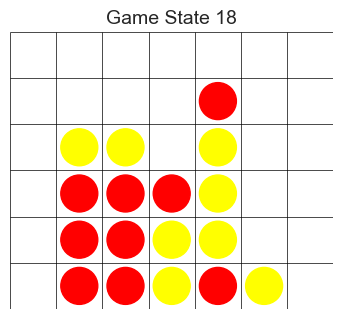

lol


(<Figure size 700x360 with 1 Axes>, <Axes: title={'center': 'Game State 18'}>)

In [8]:
boards[-2].display_board()

In [40]:
len(moves)

18

In [36]:
[board.turn_token for board in boards]
new_grids = []
for board in boards:
    grid = board.grid
    # Convert values that are this token to 1, and the other token to -1
    turn_token_mask = grid == board.turn_token
    zero_mask = grid == 0
    grid[turn_token_mask] = 1
    # If you are non-zero and not the turn token, you are -1
    grid[(~zero_mask) & (~turn_token_mask)] = -1
    new_grids.append(grid)
new_grids[-1]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0., -1., -1., -1., -1.,  0.,  0.],
       [ 0.,  1.,  1.,  1., -1.,  0.,  0.],
       [ 0.,  1.,  1., -1., -1.,  0.,  0.],
       [ 0.,  1.,  1., -1.,  1., -1.,  0.]])

In [38]:
combo = zip(new_grids,moves)
for grid, move in combo:
    print(grid)
    print(move)
    print()

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
4

[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.]]
5

[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -1.  0.]]
2

[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0. -1. -1.  0.]]
4

[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  0.]]
1

[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]